In [19]:
#manejo de datos
import pandas as pd
import numpy as np

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')   

In [20]:
df_candy = pd.read_csv("../../Datos/" + "candy-data.csv")
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [21]:
# Importa las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_candy.drop(['chocolate','competitorname'], axis=1)
y = df_candy['chocolate']
# Supongamos que tienes un conjunto de datos X (características) y y (etiquetas)
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea un modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators según tu preferencia

# Entrena el modelo en el conjunto de entrenamiento
rf_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcula la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo Random Forest: {accuracy}')


Exactitud del modelo Random Forest: 0.9230769230769231


## Matriz de Confusión:

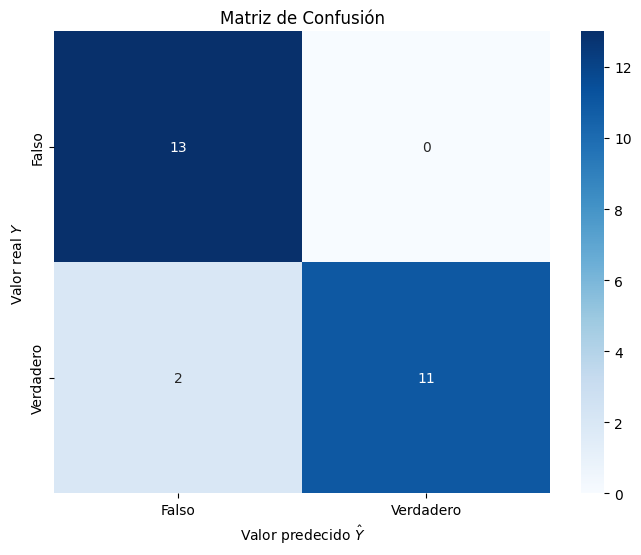

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas personalizadas para "Verdadero" y "Falso"
labels = ['Falso', 'Verdadero']

# Crea un mapa de calor (heatmap) para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valor predecido $\hat{Y}$')
plt.ylabel('Valor real $Y$')
plt.title('Matriz de Confusión')
plt.show()


En esta matriz de confusión, los números representan las siguientes métricas:

* Verdaderos Negativos (VN): 13
* Falsos Positivos (FP): 0
* Falsos Negativos (FN): 2
* Verdaderos Positivos (VP): 11

Dado este resultado, podemos hacer las siguientes conclusiones:
* Exactitud = (11 + 13)/(11 + 13 + 0 + 13) = 0.6486
* Precisión = 11/(11 + 0) = 1
* Sensibilidad = 11/(11+2) = .8461
* Especificidad = 13/(13 + 0) = 1
* Tasa de error = 2/(2+11) = .1538

In [23]:
exactitud =  (11 + 13)/(11 + 13 + 0 + 13)
precision = 11/(11 + 0)
sensibilidad = 11/(11+2)
especificidad  = 13/(13 + 0)

## Valor-F

In [24]:
# Calcular el Valor-F (F1 Score)
f1_score = 2 * (precision * precision) / (precision + precision)
print(f'Valor-F: {f1_score}')


Valor-F (F1 Score): 1.0


Esto significa que el modelo no comete errores al clasificar positivos y, en otras palabras, clasifica correctamente todos los valores positivos.

## Media-G

In [26]:
g_mean = (sensibilidad * precision) ** .05
print(f'Media-G: {g_mean}')

Media-G: 0.9916820826785376


## AUC y ROC

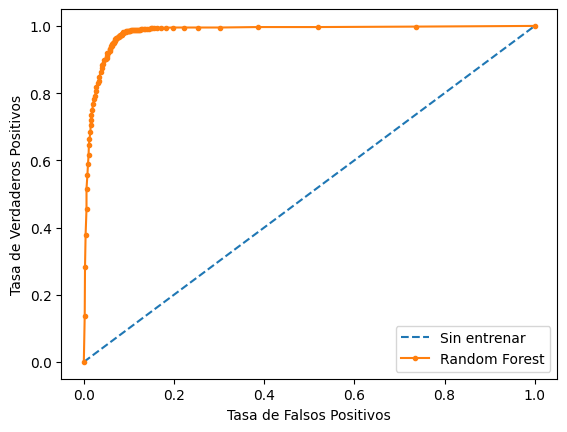

In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_classes=2)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)

# Crea un modelo Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(trainX, trainy)

# Predecimos las probabilidades
rf_probs = rf_model.predict_proba(testX)

# Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
rf_probs = rf_probs[:, 1]

# Calculamos las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para el modelo Random Forest
rf_fpr, rf_tpr, _ = metrics.roc_curve(testy, rf_probs)

# Calculamos las tasas de FPR y TPR para un modelo no entrenado (todas las predicciones son cero)
ns_probs = [0 for _ in range(len(testy))]
ns_fpr, ns_tpr, _ = metrics.roc_curve(testy, ns_probs)

# Trazamos la Curva ROC para el modelo Random Forest y el modelo no entrenado
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()


Los valores arriba y a la izquierda de la línea punteada son los valores con mejor sensibilidad (tasa de verdaderos positivos) y menor tasa de falsos positivos. Los valores sobre la línea punteada representan la misma cantidad de verdaderos positivos frente a falsos positivos. Si hubiera valores por debajo de esa línea, serían predicciones peores que el azar.